Prepare and Seperate Data

In [ ]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

ds3 = xr.open_dataset('/glade/u/home/gwallach/synthetic_holograms_v02.nc')
x_values = []
y_values = []
hists3 = [0] * 10000


#increment by 3 to seperate images
for i in ds3['x'].values[::3]:
    x_values.append([i,i+1,i+2])
for i in ds3['y'].values[::3]:
    y_values.append([i,i+1,i+2])    

Create Array of Histograms

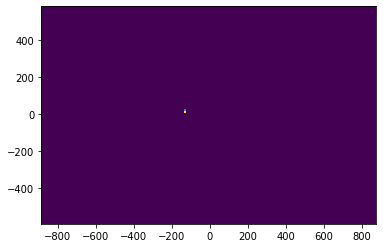

In [2]:
binsx = np.arange(-885,885,10)
binsy = np.arange(-590,590,10)
hists3[0] = plt.hist2d(x_values[0],y_values[0],bins = 100)[0]
for ii in range(1,10000):    
    #print(x_values[ii],y_values[ii])
    hist = plt.hist2d(x_values[ii],y_values[ii],bins = [binsx,binsy])[0]
    #if hist.all() == hists3[ii-1].all():
        #print("Repeat of previous")
        #break
    hists3[ii] = hist

Check For Repeats

In [3]:
print(len(hists3))
print(hists3[0])
repeats = []
for i in range(len(hists3)):
    if hists3[0].all() == hists3[i].all():
        repeats.append(1)
    else:
        repeats.append(0)
if 0 in repeats:
    print("Non-Repeat")
print("Length Repeats = ", len(repeats))
#print(repeats)

10000
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Length Repeats =  10000


In [4]:
for i in range(3):
    print(x_values[i],y_values[i])

[731.4519, 732.451904296875, 733.451904296875] [-263.08246, -262.08245849609375, -261.08245849609375]
[395.65204, 396.65203857421875, 397.65203857421875] [-412.92368, -411.9236755371094, -410.9236755371094]
[45.1899, 46.18989944458008, 47.18989944458008] [341.10986, 342.10986328125, 343.10986328125]


Include labels and dimensions for writting out  
Image x, image y for the datacube  
Make the dimensions a little smallers  
Including coordinate arrays with the boundaries of each bin so that you know what range of x values and y values
are included in each pixel. 
Pass in array of bins as the coordinates  
Coordinate variables  
need to make sure that the coordinates are the same length as the array itself  
Either chop off the last value or define it by the average of the bins  
sum up x values through colon negative 1  
(x:-1)/2 will give the bin center  


In [5]:
print(binsx)
print(binsx[:-1])

[-885 -875 -865 -855 -845 -835 -825 -815 -805 -795 -785 -775 -765 -755
 -745 -735 -725 -715 -705 -695 -685 -675 -665 -655 -645 -635 -625 -615
 -605 -595 -585 -575 -565 -555 -545 -535 -525 -515 -505 -495 -485 -475
 -465 -455 -445 -435 -425 -415 -405 -395 -385 -375 -365 -355 -345 -335
 -325 -315 -305 -295 -285 -275 -265 -255 -245 -235 -225 -215 -205 -195
 -185 -175 -165 -155 -145 -135 -125 -115 -105  -95  -85  -75  -65  -55
  -45  -35  -25  -15   -5    5   15   25   35   45   55   65   75   85
   95  105  115  125  135  145  155  165  175  185  195  205  215  225
  235  245  255  265  275  285  295  305  315  325  335  345  355  365
  375  385  395  405  415  425  435  445  455  465  475  485  495  505
  515  525  535  545  555  565  575  585  595  605  615  625  635  645
  655  665  675  685  695  705  715  725  735  745  755  765  775  785
  795  805  815  825  835  845  855  865  875]
[-885 -875 -865 -855 -845 -835 -825 -815 -805 -795 -785 -775 -765 -755
 -745 -735 -725 -715 -705 -695

In [ ]:
#dimensions are image x and image y values
cube = xr.DataArray(hists3,coords = {'x pixels':binsx[:-1],'y pixels':binsy[:-1]}, dims = {'x':1770,'y':1180})
cube.to_netcdf('data_cube.nc')